In [12]:
import cv2
import os
import pandas as pd
import numpy as np
import random
import sys
import warnings 
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [13]:
paper=load_images_from_folder('Paper')
paper = np.array(paper)


In [14]:
rock=load_images_from_folder('Stone')
rock = np.array(rock)


In [15]:
scissor=load_images_from_folder('Scissor')
scissor = np.array(scissor)


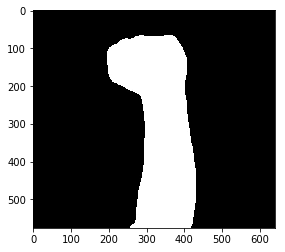

In [16]:
img=rock[0]
#img123 = cv2.cvtColor(img123, cv2.COLOR_BGR2GRAY)
#img123 = cv2.resize(img123, (48, 48))
plt.imshow(img)
plt.show()

In [17]:
Combined=pd.DataFrame()

In [18]:
print("Rock:",len(rock))
print("Paper:",len(paper))
print("Scissor",len(scissor))

Rock: 550
Paper: 549
Scissor 550


In [19]:
labels=[]
for i in range(0,550):
    labels.append(0)
for i in range(0,549):
    labels.append(1)
for i in range(0,550):
    labels.append(2)
    
labels[-1]

2

In [20]:
img=[]
for i in range(0,550):
    image=rock[i]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (100, 100))
    img.append(image)
for i in range(0,549):
    image=paper[i]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (100, 100))
    img.append(image)
for i in range(0,550):
    image=scissor[i]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (100, 100))
    img.append(image)



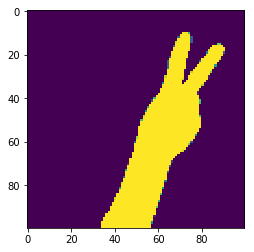

In [21]:
img12=img[-1]

plt.imshow(img12)
plt.show()

In [22]:
final=np.array(img)
final = np.expand_dims(img, axis = 3)
final.shape

(1649, 100, 100, 1)

In [23]:
Combined["Labels"]=labels
Combined["Img"]=img

In [24]:
Combined["Img"].shape

(1649,)

In [25]:
final.shape

(1649, 100, 100, 1)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( final, labels, test_size=0.25, random_state=42)
print(X_train.shape)

(1236, 100, 100, 1)


1236
1236
413
413


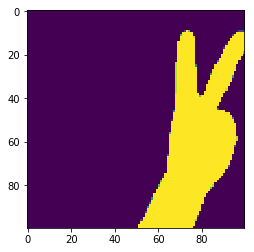

2


In [27]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
#y_train[100:110]
temp=X_train[102]
temp = np.squeeze(temp, axis = 2)
plt.imshow(temp)
plt.show()
print(y_train[102])

In [28]:
from keras.utils.np_utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
y_train[51:70]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
# Final Model Architecture:
from keras import layers
from keras import models
from keras import optimizers

modelN = models.Sequential()
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(576, 640, 1)))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(3, activation='softmax'))

# optimizer:
modelN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Training....')


#fit
nb_epoch = 5
batch_size = 128

modelF = modelN.fit(X_train, y_train, nb_epoch=nb_epoch, batch_size=batch_size,
          validation_data=(X_test, y_test), shuffle=True, verbose=1)

Training....
Instructions for updating:
Use tf.cast instead.
Train on 1236 samples, validate on 413 samples
Epoch 1/5


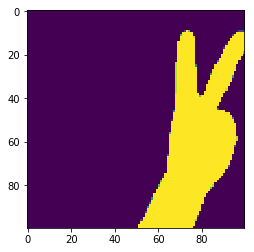

[0. 0. 1.]


In [81]:
temp=X_train[102]
temp = np.squeeze(temp, axis = 2)
plt.imshow(temp)
plt.show()
print(y_train[102])

In [51]:
img1 = cv2.resize(temp, (100, 100)) #resize to 48x48
print(img1.shape)
img_pixels = image.img_to_array(img1)
img_pixels = np.expand_dims(img_pixels, axis = 0)
print(img_pixels.shape)
y_prob = modelN.predict(img_pixels)
y_pred = [np.argmax(prob) for prob in y_prob]
#y_true = [np.argmax(true) for true in y]
HAND = y_pred[0]


print(y_prob,y_pred[0])
print(HAND)

(100, 100)
(1, 100, 100, 1)
[[1.6278042e-08 1.0000000e+00 3.3535685e-09]] 1
1


In [45]:
import cv2
from keras.models import load_model
modelN = load_model('SPC_1')
PLAY_DICT = {0:"STONE", 1:"PAPER", 2:"SCISSOR"}

In [44]:
import numpy as np
from keras_preprocessing import image
#from keras.preprocessing.image import img_to_array, array_to_img


In [12]:
cap.release()
cv2.destroyAllWindows()

In [87]:
cap_region_x_begin = 0.5  # start point/total width
cap_region_y_end = 0.8  # start point/total width
threshold = 60  # binary threshold
blurValue = 41  # GaussianBlur parameter
bgSubThreshold = 50
learningRate = 0
hand_text="None"

In [4]:
def remove_background(frame):
    fgmask = bgModel.apply(frame, learningRate=learningRate)
    kernel = np.ones((3, 3), np.uint8)
    fgmask = cv2.erode(fgmask, kernel, iterations=1)
    res = cv2.bitwise_and(frame, frame, mask=fgmask)
    return res

In [89]:
cap = cv2.VideoCapture(0)

fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, img = cap.read()

    #fgmask = fgbg.apply(img)
    
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(img, "Last hand was "+hand_text , (95,30), font, 1.0, (255, 0, 0), 2, cv2.LINE_AA)
    
    cv2.rectangle(img, (int(cap_region_x_begin * img.shape[1]), 60),(img.shape[1], int(cap_region_y_end * img.shape[0])), (255, 0, 0), 2)
    #cv2.rectangle(img,int(cap_region_x_begin * img.shape[1]),int(cap_region_y_end * img.shape[0]),(0,0,255),5)
    
    cv2.putText(img, "Press SPACE: FOR PLAYING", (5,470), font, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
    
    cv2.putText(img, "Hold Q: To Quit", (460,470), font, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
    
    #silho = fgbg.apply(img)
    cv2.imshow('img',img)
    
    
    if cv2.waitKey(1) == ord(' '):
            #img = fgbg.apply(img)
            bgModel = cv2.createBackgroundSubtractorMOG2(0, bgSubThreshold)
            img = cv2.bilateralFilter(img, 5, 50, 100)  # smoothing filter
            #img = cv2.flip(img, 1)  # flip the frame horizontally
            cv2.rectangle(img, (int(cap_region_x_begin * img.shape[1]), 60),(img.shape[1], int(cap_region_y_end * img.shape[0])), (255, 0, 0), 2)
            img = remove_background(img)
            img = img[60:int(cap_region_y_end * img.shape[0]), int(cap_region_x_begin * img.shape[1]):img.shape[1]]
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            blur = cv2.GaussianBlur(gray, (blurValue, blurValue), 0)
            # cv2.imshow('blur', blur)
            ret, thresh = cv2.threshold(blur, threshold, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            thresh=~thresh
            cv2.imwrite("test.jpg", thresh)
            
            
            
            img1 = cv2.imread("test.jpg")
            img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
            
            img1 = cv2.resize(img1, (100, 100)) #resize to 48x48
            
            img_pixels = image.img_to_array(img1)
            img_pixels = np.expand_dims(img_pixels, axis = 0)
            print(img_pixels.shape)
            y_prob = modelN.predict(img_pixels)
            y_pred = [np.argmax(prob) for prob in y_prob]
            #y_true = [np.argmax(true) for true in y]
            HAND = y_pred[0]
            

            print(y_prob,y_pred[0])
            print(HAND)
            print(PLAY_DICT[HAND])
            hand_text=PLAY_DICT[HAND]
            
            
            
            
            
            
    
    if cv2.waitKey(1) == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break

cap.release()
cv2.destroyAllWindows()

(1, 100, 100, 1)
[[1.9768284e-11 9.9893993e-01 1.0600453e-03]] 1
1
PAPER
(1, 100, 100, 1)
[[2.1123454e-15 5.4438011e-14 1.0000000e+00]] 2
2
SCISSOR
(1, 100, 100, 1)
[[7.1787155e-12 2.9200455e-09 1.0000000e+00]] 2
2
SCISSOR
(1, 100, 100, 1)
[[4.327422e-09 7.381256e-07 9.999993e-01]] 2
2
SCISSOR
(1, 100, 100, 1)
[[1.4868785e-11 6.2809796e-08 9.9999988e-01]] 2
2
SCISSOR
(1, 100, 100, 1)
[[2.8083663e-10 1.3984614e-08 1.0000000e+00]] 2
2
SCISSOR
(1, 100, 100, 1)
[[1.7187031e-06 5.3612040e-03 9.9463707e-01]] 2
2
SCISSOR
(1, 100, 100, 1)
[[7.5644846e-07 1.4565557e-03 9.9854267e-01]] 2
2
SCISSOR
(1, 100, 100, 1)
[[2.0014103e-10 4.7909083e-13 1.0000000e+00]] 2
2
SCISSOR


In [7]:
img1 = cv2.imread("test.jpg")
print(img1.shape)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
print(img1.shape)
img1 = cv2.resize(img1, (100, 100)) #resize to 48x48
print(img1.shape)
img_pixels = image.img_to_array(img1)
img_pixels = np.expand_dims(img_pixels, axis = 0)
print(img_pixels.shape)
y_prob = modelN.predict(img_pixels)
y_pred = [np.argmax(prob) for prob in y_prob]
#y_true = [np.argmax(true) for true in y]
HAND = y_pred[0]


print(y_prob,y_pred[0])
print(HAND)

(384, 320, 3)
(384, 320)
(100, 100)
(1, 100, 100, 1)
[[1.4528899e-10 4.0311730e-05 9.9995971e-01]] 2
2


In [72]:
model = load_model('VGG_cross_validated.h5')
def predict_rgb_image(img):
    result = model.predict(img)[0]
    print(result)
    return (result)

(224, 224, 3)
(1, 224, 224, 3)


TypeError: Invalid dimensions for image data

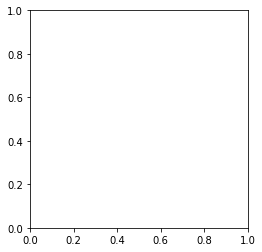

In [84]:
#temp = cv2.cvtColor(temp,cv2.COLOR_GRAY2RGB)
img1 = cv2.resize(temp, (224, 224)) #resize to 48x48
print(img1.shape)
img_pixels = image.img_to_array(img1)
img_pixels = np.expand_dims(img_pixels, axis = 0)
print(img_pixels.shape)
plt.imshow(img_pixels)
plt.show()






model.predict(img_pixels)
y_pred = [np.argmax(prob) for prob in y_prob]
#y_true = [np.argmax(true) for true in y]
print(y_prob,y_pred[0])
print(HAND)

HAND = y_pred[0]
